In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.svm import SVC     ### SVM for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

import random
import numpy as np
import math
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 

In [2]:
from sklearn.tree import export_text

from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from datetime import datetime

In [3]:
def comparative(df):
    Y = df[['class']]
    X = df.iloc[:,df.columns !='class']
    r,c = df.shape
    acc_DT =list()
    acc_RF = list()

    time_DT =list()
    time_RF =list()
    
    for i in range(10):
        print ("Chay Lan thu: ", i)

# split data
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y,  stratify=Y, train_size=0.7)
        
# decision tree        
        start = datetime.now()

        model = DecisionTreeClassifier()        
        model.fit(X_Train, Y_Train)            
        predictions = model.predict(X_Test)
        end = datetime.now() -start
        time_DT.append(end)

        print("Độ chinh xac Cay Quyet Dinh:",metrics.accuracy_score(Y_Test, predictions))
        acc_DT.append(metrics.accuracy_score(Y_Test, predictions))
        


        
        
#random forest
        start = datetime.now()

        rf_model = RandomForestClassifier(n_estimators=100, max_features= int(math.sqrt(c))+1)
        rf_model.fit(X_Train,Y_Train.values.ravel())
        pred_y = rf_model.predict(X_Test)
           
        end = datetime.now() -start
        time_RF.append(end)
                
        accRF = metrics.accuracy_score(Y_Test, pred_y)
        acc_RF.append(accRF)
        print ("Độ chính xác RF: ",accRF) 
    
        

    results =[]
    results.append(acc_DT)
    results.append(acc_RF)

    names =('Decision tree','Random forest')
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    
   # ax = fig.add_subplot(111)
#    plt.boxplot(results)
    #plt.boxplot(results, labels=names, showmeans = True)
    plt.boxplot(results, labels=names)
    plt.ylabel('Accuracy')    

    #ax.set_xticklabels(names)
    plt.show()            
    
    print ("Results")
    print ("decision tree")
    print (np.mean(acc_DT))    ## gia tri trung binh  
    print (np.std(acc_DT))     ## Do lech chuan   
    
    

    
    print ("Random forest")
    print (np.mean(acc_RF))    ## gia tri trung binh  
    print (np.std(acc_RF))     ## Do lech chuan   
    
    print ("Time")
    print (np.mean(time_DT))
    print (np.mean(time_RF))
    

In [4]:
def load_data():
    
    x=2
    #Breast2classes
    df = pd.read_csv('Leukemia_4c1.csv', header = 0) 
    r,c = df.shape
    df.columns.values[0] = "class" 
    
    comparative(df)

Chay Lan thu:  0
Độ chinh xac Cay Quyet Dinh: 0.7222222222222222
Độ chính xác RF:  0.5
Chay Lan thu:  1
Độ chinh xac Cay Quyet Dinh: 0.4444444444444444
Độ chính xác RF:  0.6111111111111112
Chay Lan thu:  2
Độ chinh xac Cay Quyet Dinh: 0.4444444444444444
Độ chính xác RF:  0.6666666666666666
Chay Lan thu:  3
Độ chinh xac Cay Quyet Dinh: 0.6111111111111112
Độ chính xác RF:  0.7777777777777778
Chay Lan thu:  4
Độ chinh xac Cay Quyet Dinh: 0.4444444444444444
Độ chính xác RF:  0.7222222222222222
Chay Lan thu:  5
Độ chinh xac Cay Quyet Dinh: 0.7777777777777778
Độ chính xác RF:  0.6666666666666666
Chay Lan thu:  6
Độ chinh xac Cay Quyet Dinh: 0.7777777777777778
Độ chính xác RF:  0.6666666666666666
Chay Lan thu:  7
Độ chinh xac Cay Quyet Dinh: 0.6111111111111112
Độ chính xác RF:  0.5555555555555556
Chay Lan thu:  8
Độ chinh xac Cay Quyet Dinh: 0.7222222222222222
Độ chính xác RF:  0.6666666666666666
Chay Lan thu:  9
Độ chinh xac Cay Quyet Dinh: 0.5
Độ chính xác RF:  0.6666666666666666


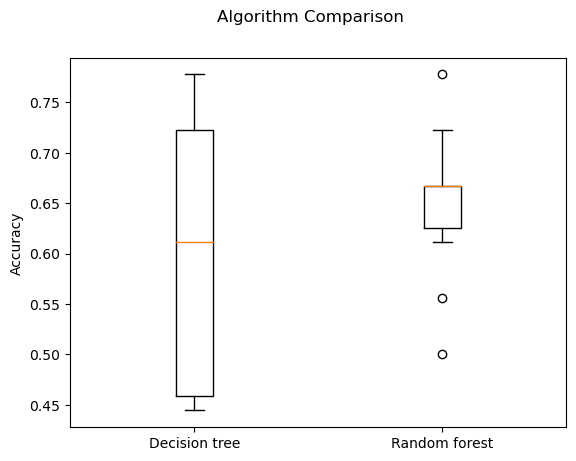

Results
decision tree
0.6055555555555556
0.13252067157640626
Random forest
0.65
0.07474235581707615
Time
0:00:00.086281
0:00:00.145659


In [47]:
def main():
    x=1
    load_data()
    
    
if __name__ =="__main__":
    main()